In [1]:
import numpy as np
import pandas as pd

from rdkit import Chem
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_ipab = pd.read_csv("./docked_ipab.csv")
df_fda = pd.read_csv("./docked_fda.csv")

In [4]:
df_ipab_r1 = df_ipab.sort_values("confidence").query('rank_id == 1')
df_fda_r1 = df_fda.sort_values("confidence").query('rank_id == 1')

In [5]:
df_ipab_r1 = df_ipab_r1[df_ipab_r1.all_pass.astype(bool)]
df_fda_r1= df_fda_r1[df_fda_r1.all_pass.astype(bool)]

In [6]:
df_docked_ipab = pd.read_csv("../autodock_vina/results_ipab/docked.csv")
df_docked_fda = pd.read_csv("../autodock_vina/results_fda/docked.csv")

In [7]:
df_merged_ipab = df_ipab_r1.merge(df_docked_ipab, on="Znumber")
df_merged_fda = df_fda_r1.merge(df_docked_fda, on="Znumber")

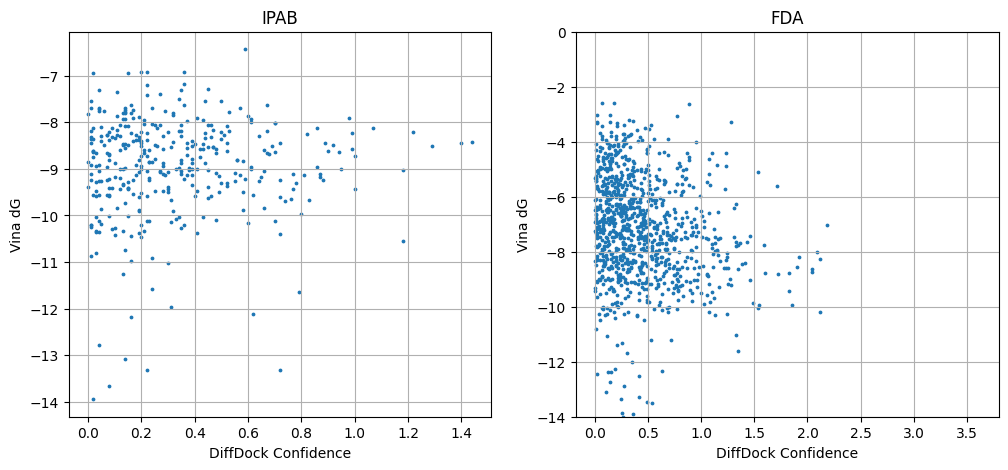

In [8]:
markersize: float = 3.0
show_x_col = "confidence"
show_y_col = "score"
xlabel_name = 'DiffDock Confidence'
ylable_name = 'Vina dG'

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_merged_ipab[show_x_col].values, df_merged_ipab[show_y_col].values, marker='o', s=markersize)
plt.xlabel(xlabel_name)
plt.ylabel(ylable_name)
plt.title(f"IPAB")
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(df_merged_fda[show_x_col].values, df_merged_fda[show_y_col].values, marker='o', s=markersize)
plt.xlabel(xlabel_name)
plt.ylabel(ylable_name)
plt.ylim(-14, 0)
plt.title(f"FDA")

plt.grid()
plt.savefig("diffdock-01.png")
plt.show()


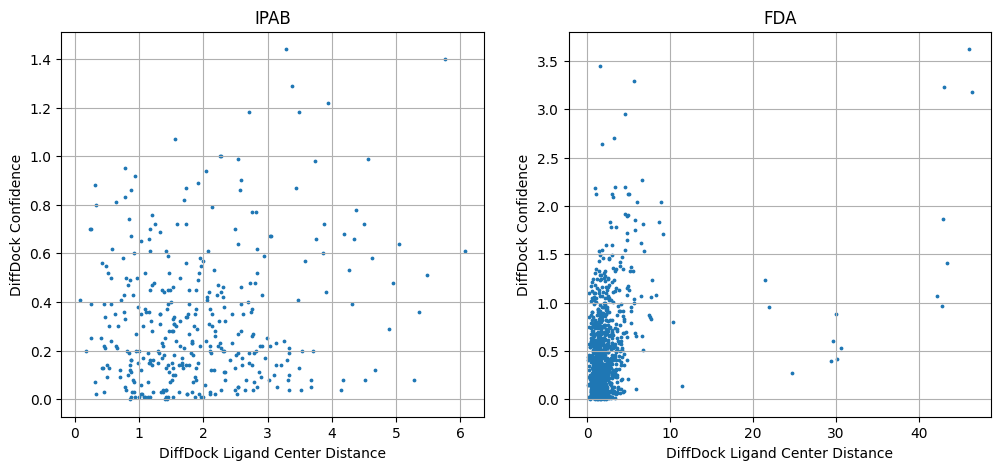

In [9]:
markersize: float = 3.0
show_x_col = "center_distance"
show_y_col = "confidence"
xlabel_name = 'DiffDock Ligand Center Distance'
ylable_name = 'DiffDock Confidence'

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_merged_ipab[show_x_col].values, df_merged_ipab[show_y_col].values, marker='o', s=markersize)
plt.xlabel(xlabel_name)
plt.ylabel(ylable_name)
plt.title(f"IPAB")
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(df_merged_fda[show_x_col].values, df_merged_fda[show_y_col].values, marker='o', s=markersize)
plt.xlabel(xlabel_name)
plt.ylabel(ylable_name)
plt.title(f"FDA")

plt.grid()
plt.savefig("diffdock-02.png")
plt.show()



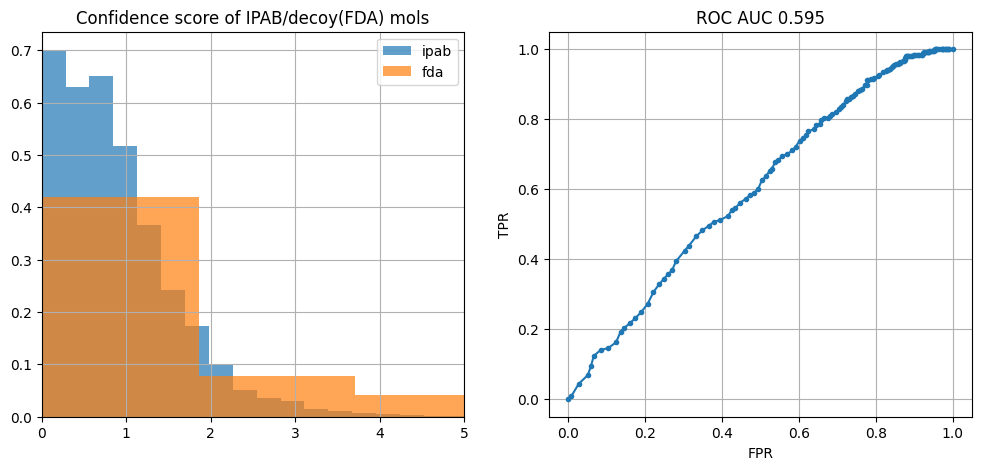

In [10]:
df_ipab_r1["label"] = 1
df_fda_r1["label"] = 0
df_merged = pd.concat([df_ipab_r1, df_fda_r1], axis=0)
true_label = df_merged.label.values == 1
pred = df_merged.confidence.values

plt.figure(figsize=(12, 5))
markersize: float = 3.0
plt.subplot(1, 2, 1)
plt.hist(df_ipab.confidence.values, bins=20, label='ipab', density=True, alpha=0.7)
plt.hist(df_fda.query("confidence > 0").query("confidence < 10").confidence.values, bins=5, label='fda', density=True, alpha=0.7)
plt.xlim(0, 5)
plt.grid()
plt.legend()
plt.title("Confidence score of IPAB/decoy(FDA) mols")

plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(true_label, -pred)
roc_auc = roc_auc_score(true_label, -pred)
plt.plot(fpr, tpr, marker='o', markersize=markersize)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f"ROC AUC {roc_auc:.3f}")
plt.grid()

plt.savefig("diffdock-03.png")

plt.show()